<a href="https://colab.research.google.com/github/icarocarmona/Tech-Challenges-DTAT-Grupo-26/blob/main/EAD_Tech_Fase2_BIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importanto a base da bolsa considerando o período de 01/01/2023 até 16/01/2024

import yfinance as yf

symbol = '^BVSP'
start_date = '2023-01-01'
end_date = '2024-01-16'

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
# Pegando os dados importados e colocando em um DF

df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Criando csv com os dados importados

csv_filename = 'dadosBolsa.csv'
df.to_csv(csv_filename)

# Agora só olhar ali nos arquivos que verá o csv

In [4]:
# Importanto a lib do pandas

import pandas as pd

In [5]:
# Conhecendo mais sobre a nossa base e tratando

df = pd.read_csv("dadosBolsa.csv", sep=",")

In [6]:
# Com a função info() conseguimos ver detalhes, tipos sobre a nossa base

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       258 non-null    object 
 1   Open       258 non-null    float64
 2   High       258 non-null    float64
 3   Low        258 non-null    float64
 4   Close      258 non-null    float64
 5   Adj Close  258 non-null    float64
 6   Volume     258 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.2+ KB


In [7]:
# Com o shape conseguimos ver a quantidade de linhas e colunas

df.shape

(258, 7)

In [8]:
# Com a função head() pegamos as cinco primeiras linhas da base, caso queria uma quantidade específica só colocar nos parenteses, por ex: df.head(3) viriam somente três linhas

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,109734.0,109734.0,105981.0,106376.0,106376.0,8130500
1,2023-01-03,106377.0,106684.0,103852.0,104166.0,104166.0,14466700
2,2023-01-04,104167.0,105627.0,103915.0,105334.0,105334.0,14451200
3,2023-01-05,105336.0,107743.0,105333.0,107518.0,107518.0,15512000
4,2023-01-06,107642.0,109433.0,107642.0,108836.0,108836.0,12626600


In [9]:
# Verificando se há dados nulos na base, mesmo com a info() já mostrando, é bom certificar

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# Verificando se há  dados duplicados na base

df.duplicated().sum()

0

In [11]:
# Com a função describe() conseguimos ver infos da nossa base como a média (mean), desvio padrão (std)

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,258.000000,258.000000,258.000000,258.000000,258.000000,2.580000e+02
mean,114794.558140,115694.449612,114002.100775,114871.205426,114871.205426,1.161534e+07
std,8392.296974,8325.080057,8488.183161,8450.772509,8450.772509,3.432755e+06
min,97926.000000,99258.000000,96997.000000,97926.000000,97926.000000,0.000000e+00
25%,108481.250000,109465.750000,107625.500000,108458.000000,108458.000000,9.821000e+06
50%,115237.000000,115978.500000,114685.500000,115361.000000,115361.000000,1.147830e+07
75%,119085.500000,119745.750000,118180.250000,119096.750000,119096.750000,1.356445e+07
max,134194.000000,134392.000000,133832.000000,134194.000000,134194.000000,1.985300e+07


In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,109734.0,109734.0,105981.0,106376.0,106376.0,8130500
1,2023-01-03,106377.0,106684.0,103852.0,104166.0,104166.0,14466700
2,2023-01-04,104167.0,105627.0,103915.0,105334.0,105334.0,14451200
3,2023-01-05,105336.0,107743.0,105333.0,107518.0,107518.0,15512000
4,2023-01-06,107642.0,109433.0,107642.0,108836.0,108836.0,12626600


In [13]:
# Iniciando algumas análises - Para as análises podemos usar algumas libs

import seaborn as sns
import matplotlib.pyplot as plt

df_limpo = df                                                              # cópia do dataframe
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])                        # transformando em datetime
df_limpo = df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])     # Removendo colunas desnecessárias
df_limpo = df_limpo.set_index('Date')                                      # definindo data como índice

In [14]:
df_limpo.head()

,Adj Close
Date,
2023-01-02,106376.0
2023-01-03,104166.0
2023-01-04,105334.0
2023-01-05,107518.0
2023-01-06,108836.0


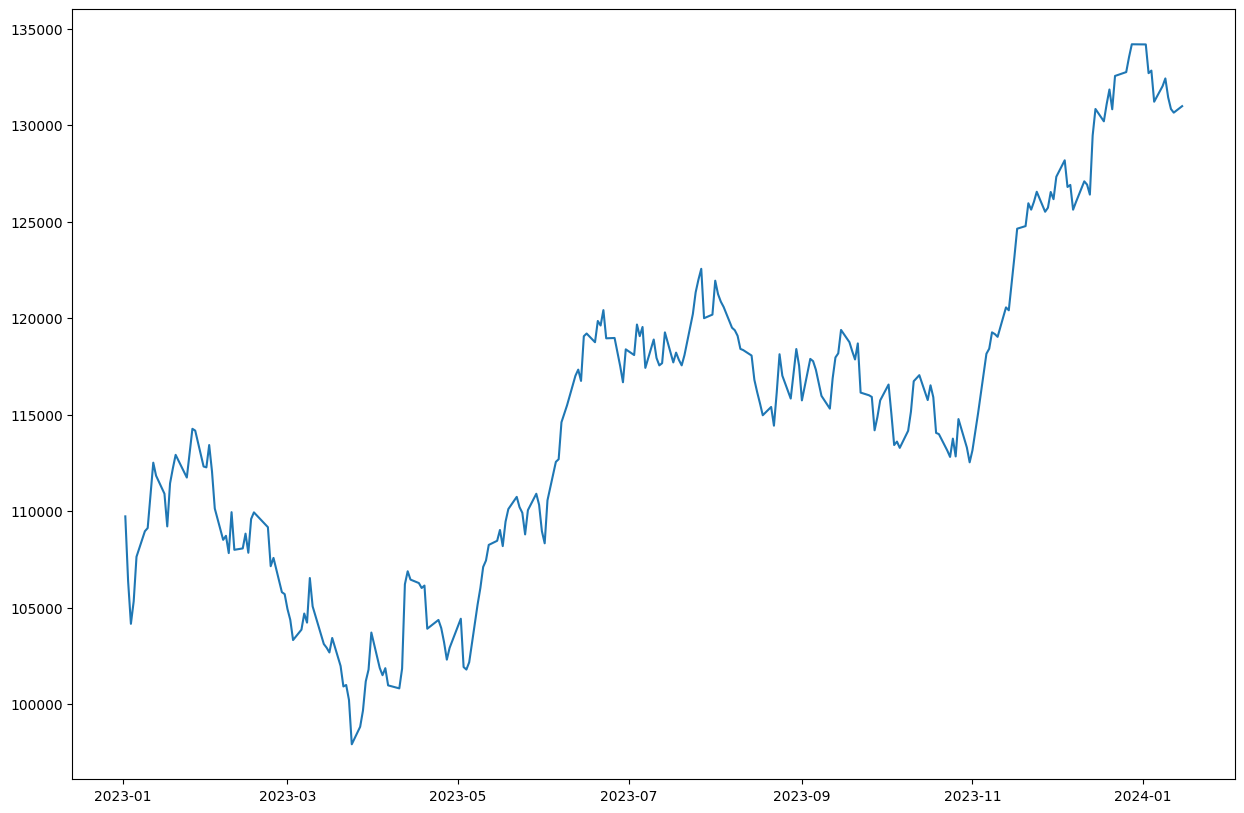

In [15]:
# Relação Date x Open

plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['Open'], label='BVSP')

plt.show()

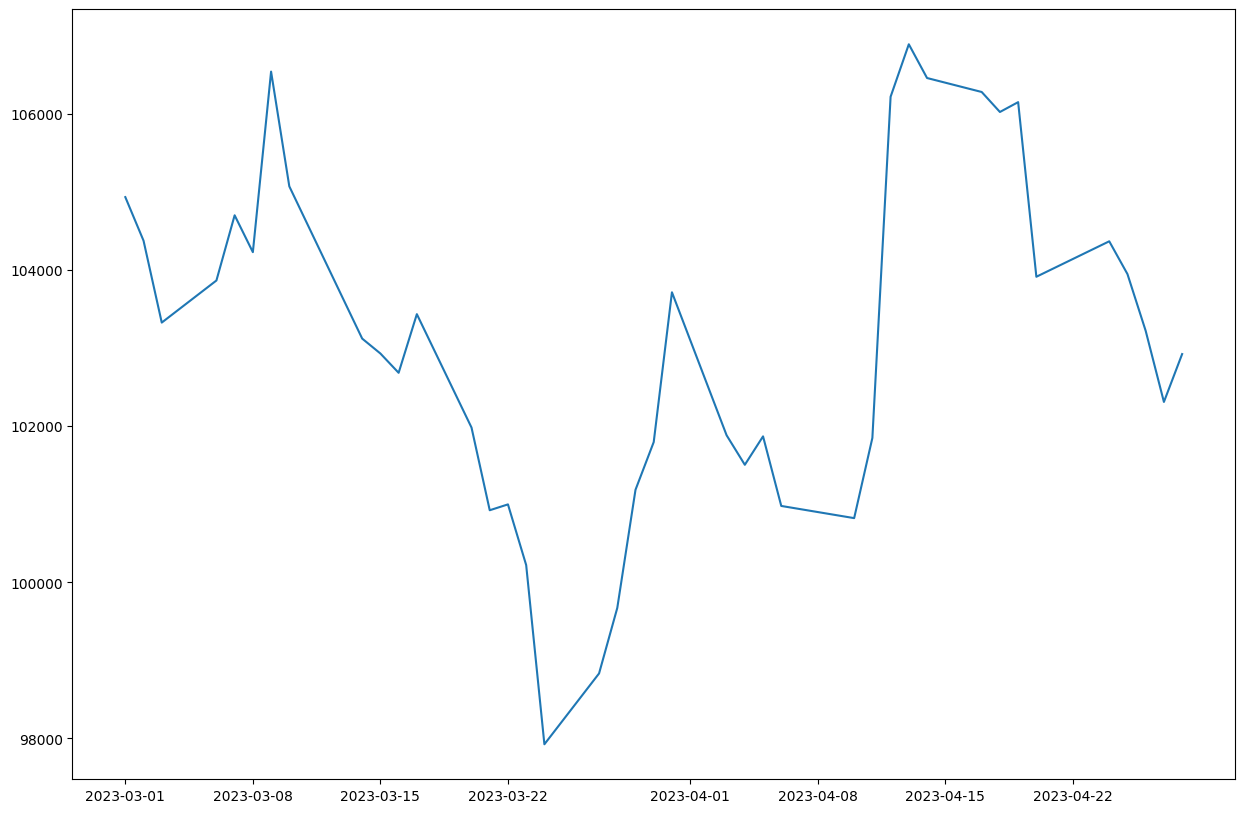

In [16]:
# Detalhando períodos de queda aparente

# Maior pico de queda aparente aconnteceu entre 2023-03 e 2023-05

periodo1 = (df['Date'] >= '2023-03-01') & (df['Date'] <= '2023-05-01')

df_periodo1 = df[periodo1]

plt.figure(figsize = (15,10))
plt.plot(df_periodo1['Date'], df_periodo1['Open'], label='BVSP')

plt.show()

Possível motivo: https://exame.com/invest/mercados/ibovespa-hoje-31-03-2023/

Analisando o primeiro trimestre de 2023, podemos ver que janeiro começou de forma positiva subindo 3,4%, apoiado principalmente nas ações das commodities com a reabertura econômica da China.

Em fevereiro, olhando para a situação macroeconômica percebemos um "aperto". Aqui internamente, debates entre o presidente do Brasil e o Banco Central continuou trazendo volatilidade. Nos Estados Unidos, fortes inflamções aumentaram o receio de um aperto monetário mais duro. O Ibovespa caiu 7,5% no mês, seu pior resultado mensal desde junho de 2022.

Em março, ainda com a volatilidade acontecendo, uns dos principais motivos que ajudaram nesta queda foi a crise bancária deflagrada pelo americano SVB tomou as manchetes e acendeu um alerta sobre os efeitos da trajetória de alta dos juros.

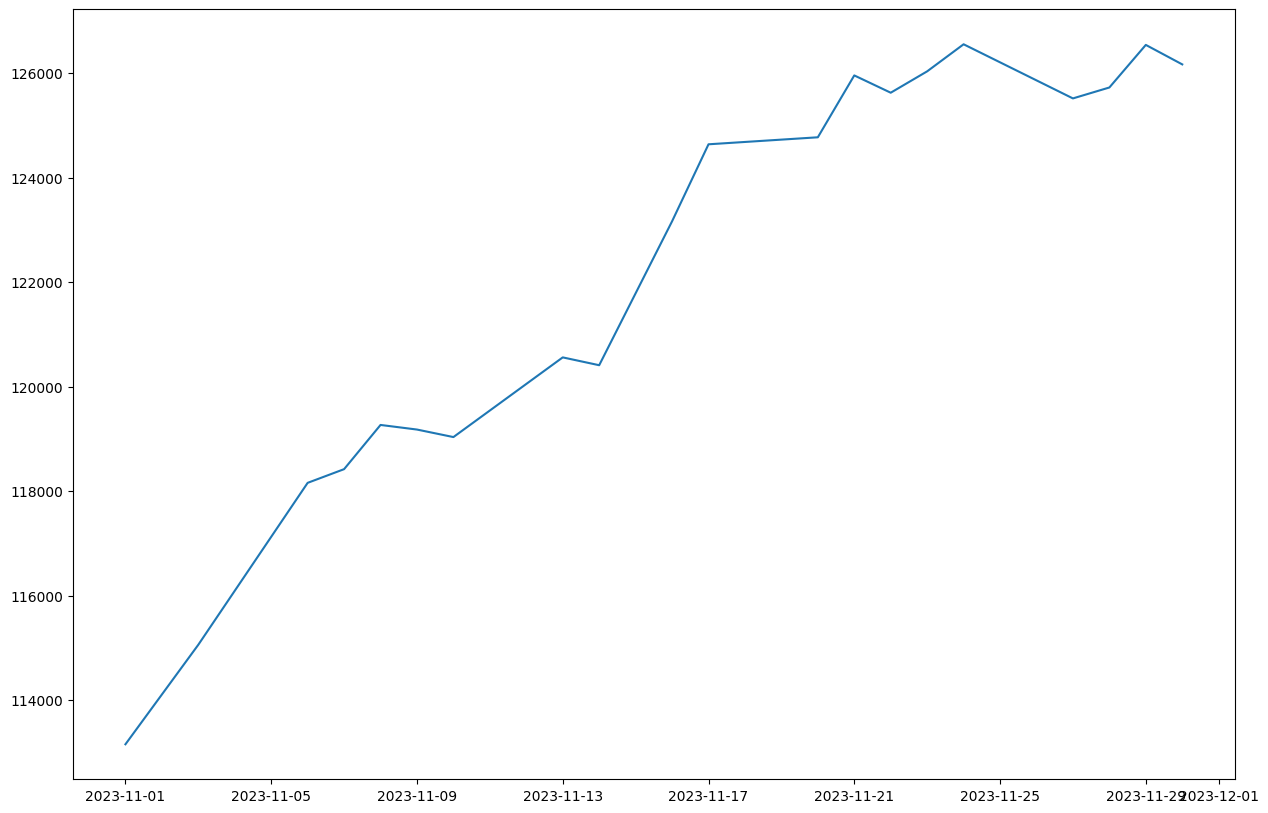

In [17]:
# Detalhando período de alta aparente

# Maior crescimento aparente parece ter acontecido entre 2023-11 e entrando em 2024-01

periodo2 = (df['Date'] >= '2023-11-01') & (df['Date'] <= '2023-11-30')

df_periodo2 = df[periodo2]

plt.figure(figsize = (15,10))
plt.plot(df_periodo2['Date'], df_periodo2['Open'], label='BVSP')

plt.show()

Possível motivo: https://einvestidor.estadao.com.br/mercado/ibovespa-alta-novembro-2023/ - https://www.cnnbrasil.com.br/economia/mercados-hoje-30-de-novembro-de-2023/

Em novembro de 2023 vimos uma alta mensal de 12,54%, o que não acontecia desde 2020. Olhando principalmente para o cenário interno, a questão fiscal voltou a ficar em evidência e com indicativos mais positivos Em novembro, o governo sinalizou que deve manter a meta de déficit fiscal zero no Projeto de Lei de Diretrizes Orçamentárias (PLDO) de 2024.

Também houve o que podemos chamar de alta generalizada, o que envolve acontecimentos externos, por exemplo, o ciclo de alta de juros nos EUA que também influenciou de forma positiva a bolsa.

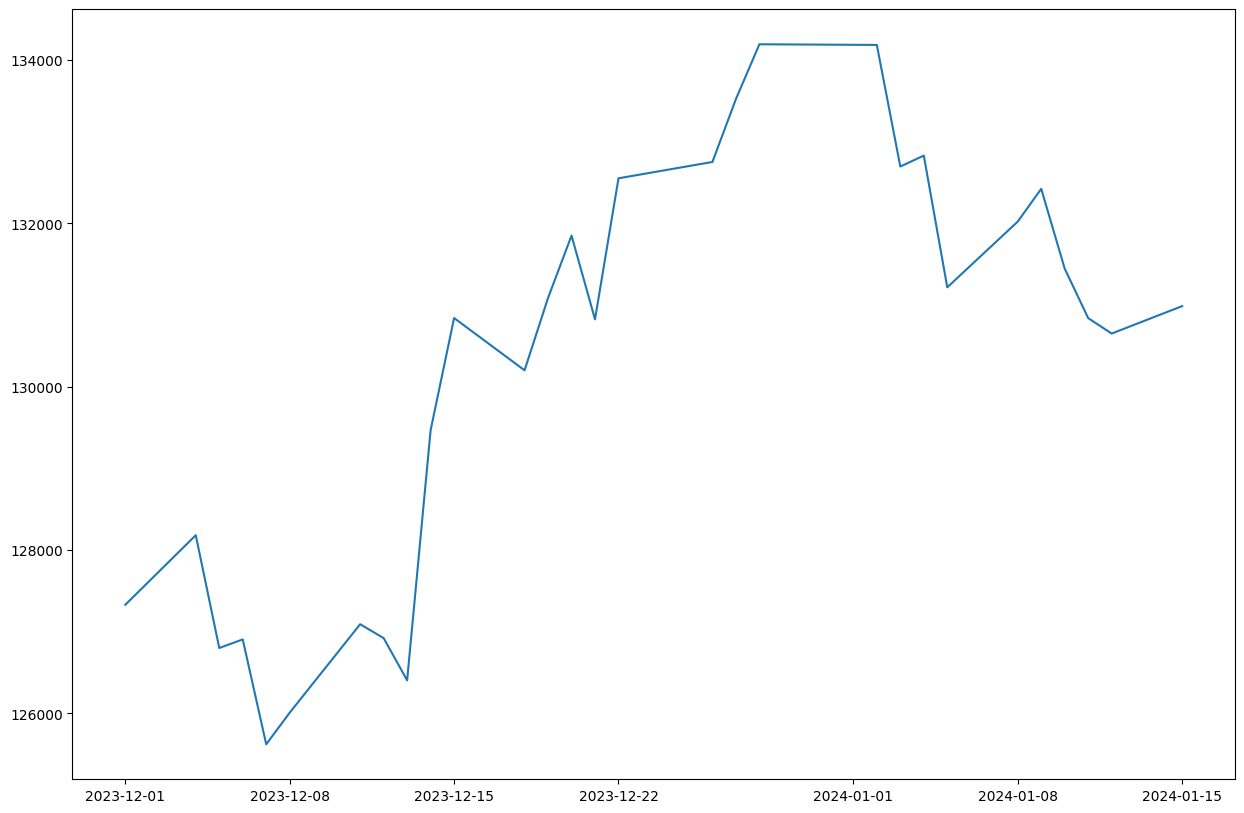

In [18]:
# Detalhando aumento em 2024-01

periodo3 = (df['Date'] >= '2023-12-01') & (df['Date'] <= '2024-01-16')

df_periodo3 = df[periodo3]

plt.figure(figsize = (15,10))
plt.plot(df_periodo3['Date'], df_periodo3['Open'], label='BVSP')

plt.show()

Possível motivo: https://einvestidor.estadao.com.br/mercado/o-que-esperar-ibovespa-janeiro-2024/

O que justificaria este crescimento, seria o que vimos nas últimas análises a perspectiva de fim do ciclo de alta de juros nos Estados Unidos e a melhora do cenário macro no Brasil, permanecem no radar. Sem novos fatores, esses eventos devem manter o a tendência positiva no mercado.

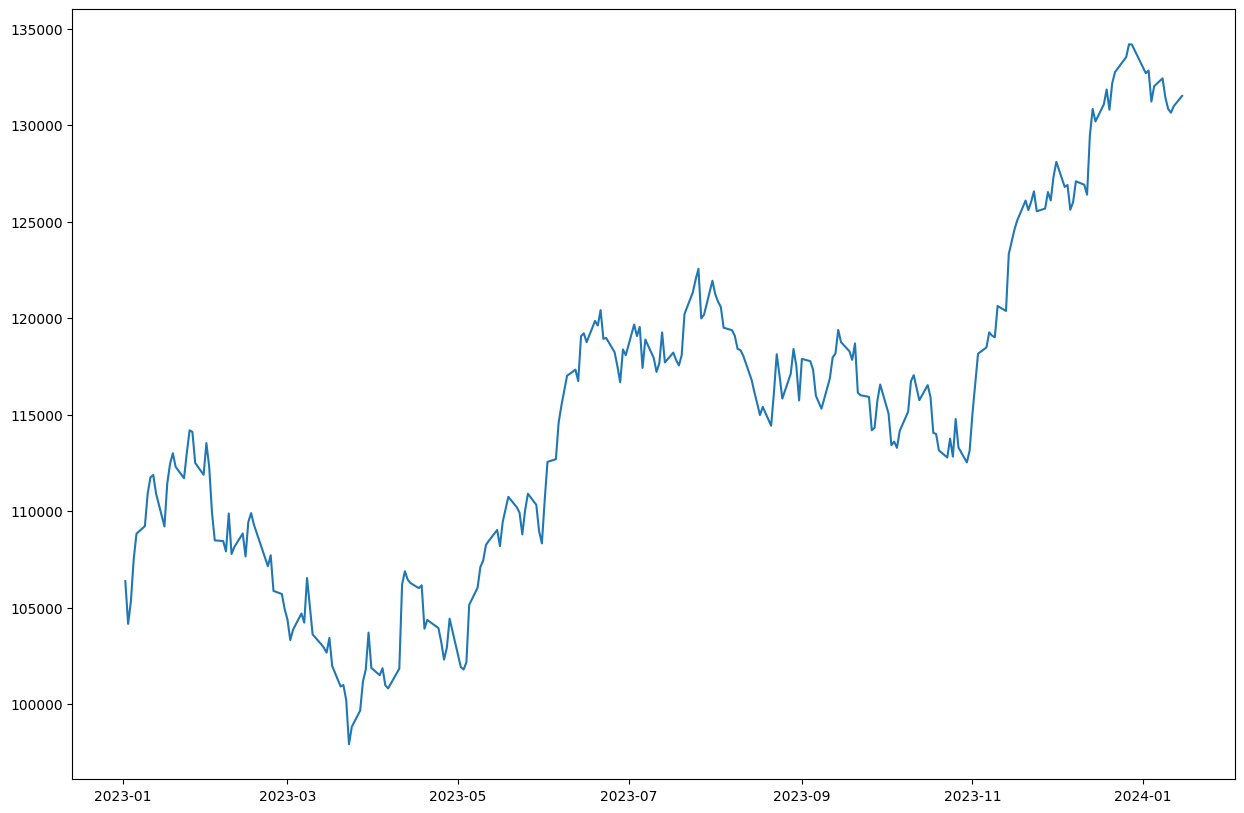

In [19]:
# Relação Date x Adj Close (selecionar um período)

plt.figure(figsize = (15,10))
plt.plot(df['Date'],df['Adj Close'], label='BVSP')

plt.show()

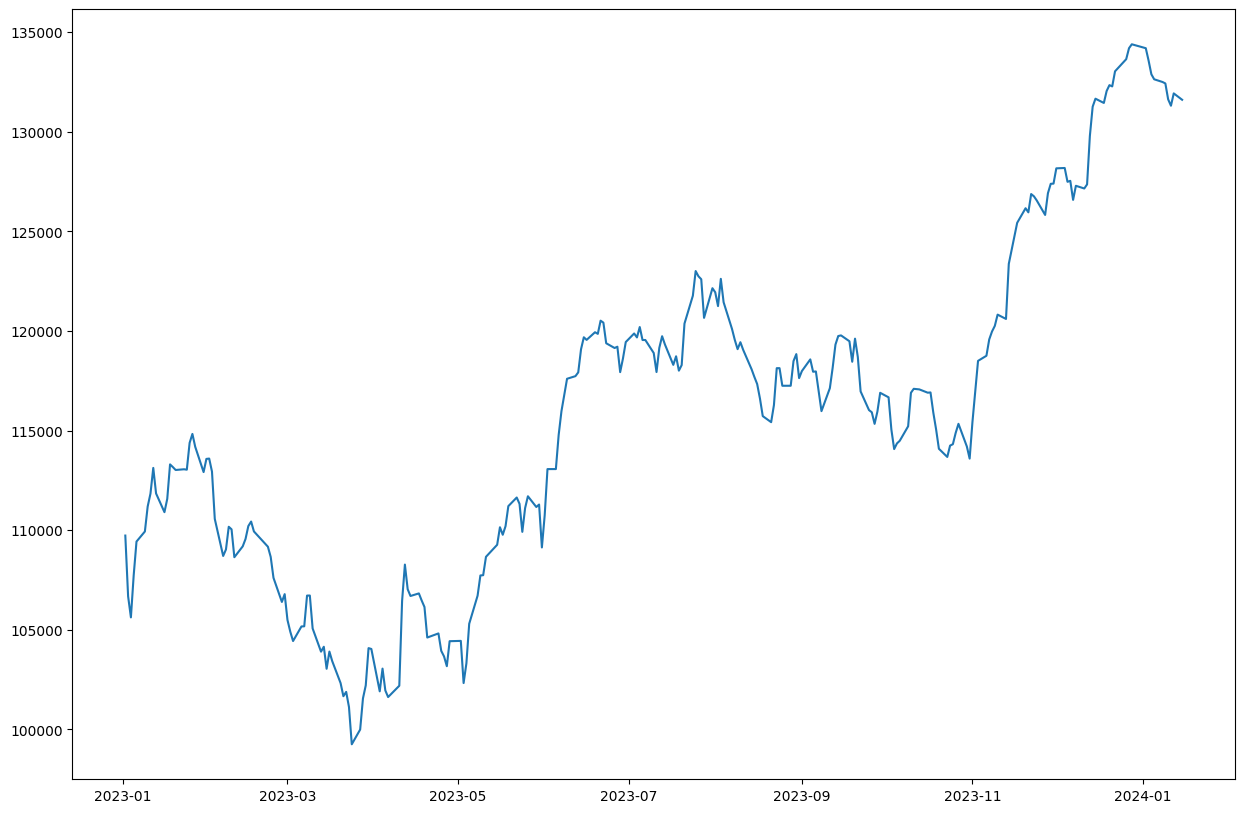

In [20]:
# Relação Date x High (selecionar um período)

plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['High'], label='BVSP')

plt.show()

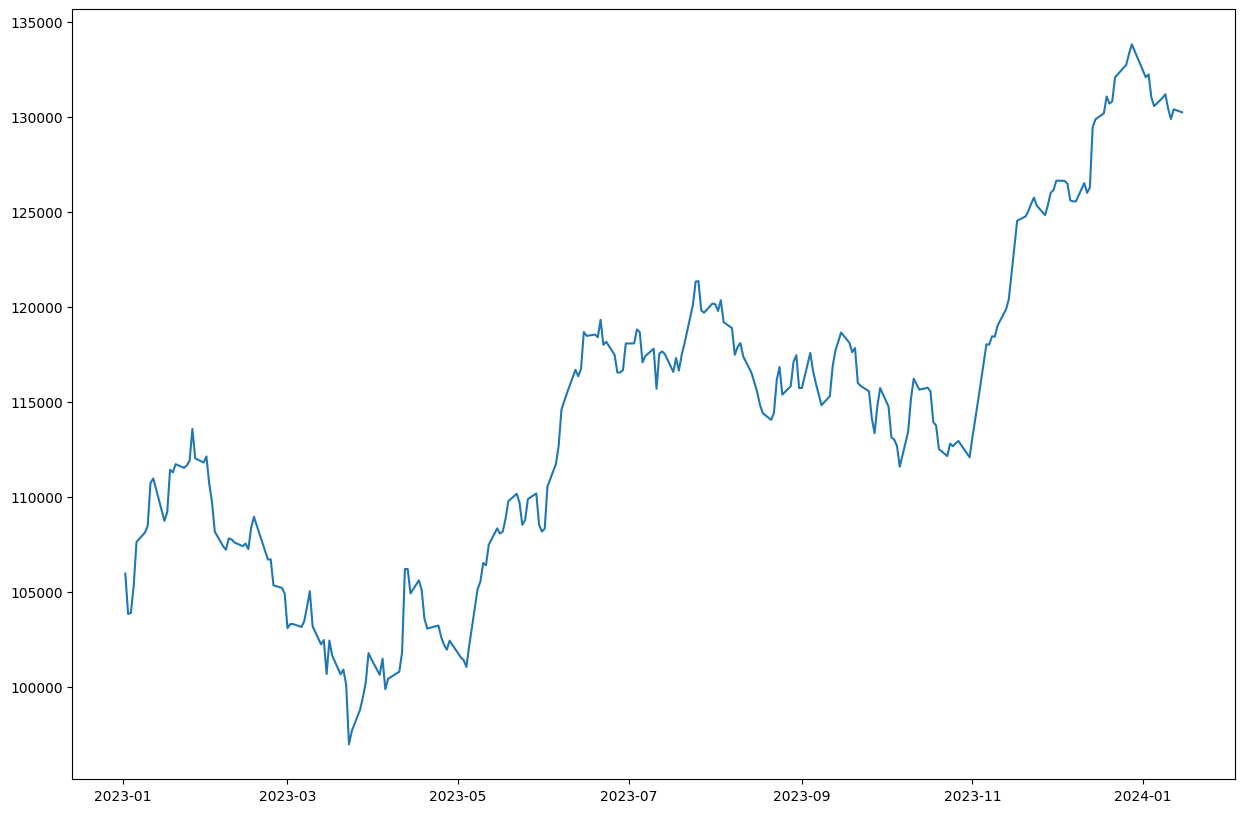

In [21]:
# Relação Date x Low (selecionar um período)

plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['Low'], label='BVSP')

plt.show()

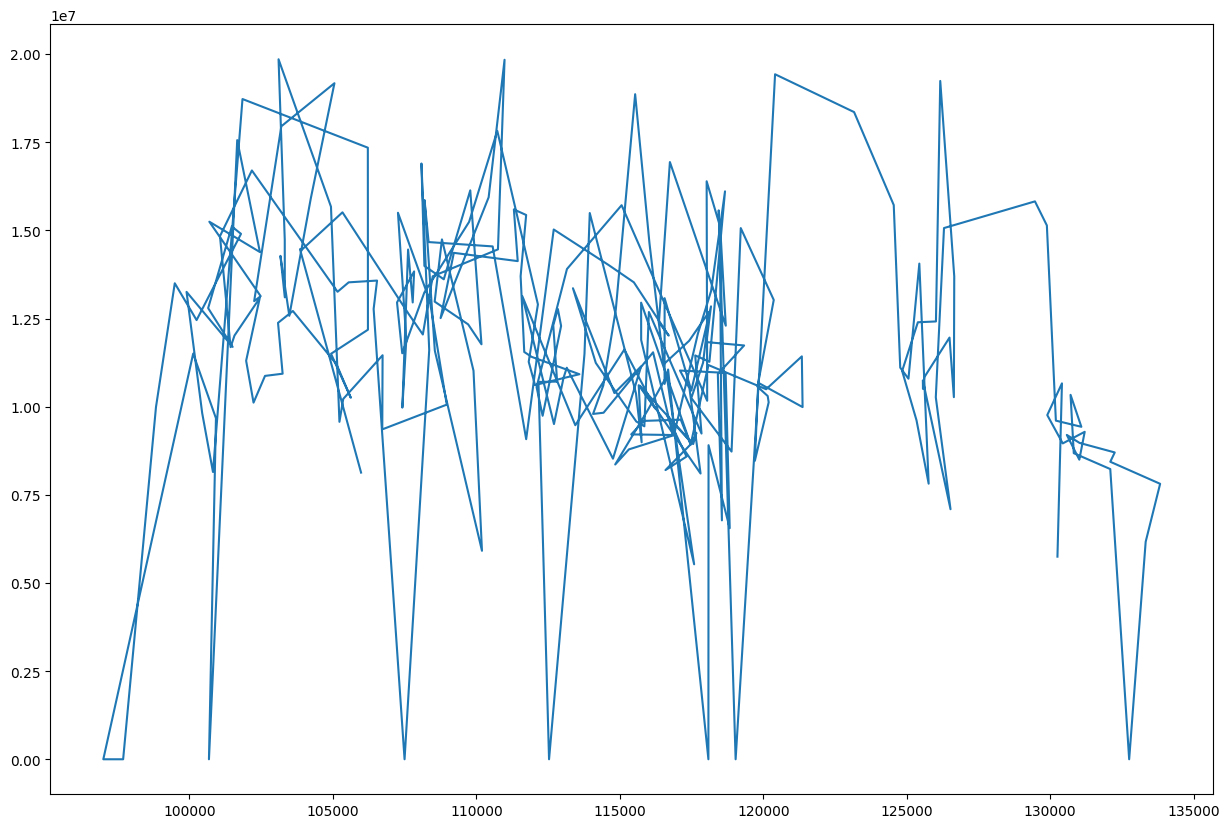

In [22]:
# Relação Low x Volume (selecionar um período)

plt.figure(figsize = (15,10))
plt.plot(df['Low'], df['Volume'], label='BVSP')

plt.show()